In [66]:
#import all required packages
import numpy as np
import pandas as pd
import math
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
#First Problem

In [67]:
#Read the dataset
df1 = pd.read_csv("Wholesale+Customers+Data.csv")

In [68]:
#1.1 display head and add a new column 'Total', that shows total spent accross all items
df1["Total"] = df1["Fresh"]+df1["Milk"]+df1["Grocery"]+df1["Frozen"]+df1["Detergents_Paper"]+df1["Delicatessen"]
df1.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [69]:
#Describe the dataset
print("The below table describes the data present in the dataset\n")
df1.describe(include = 'all').T

The below table describes the data present in the dataset



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.00,NaN,NaN,NaN,220.50,127.16,1.00,110.75,220.50,330.25,440.00
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.00,NaN,NaN,NaN,12000.30,12647.33,3.00,3127.75,8504.00,16933.75,112151.00
Milk,440.00,NaN,NaN,NaN,5796.27,7380.38,55.00,1533.00,3627.00,7190.25,73498.00
Grocery,440.00,NaN,NaN,NaN,7951.28,9503.16,3.00,2153.00,4755.50,10655.75,92780.00
Frozen,440.00,NaN,NaN,NaN,3071.93,4854.67,25.00,742.25,1526.00,3554.25,60869.00
Detergents_Paper,440.00,NaN,NaN,NaN,2881.49,4767.85,3.00,256.75,816.50,3922.00,40827.00
Delicatessen,440.00,NaN,NaN,NaN,1524.87,2820.11,3.00,408.25,965.50,1820.25,47943.00
Total,440.00,NaN,NaN,NaN,33226.14,26356.30,904.00,17448.75,27492.00,41307.50,199891.00


In [70]:
#1.1 Check using groupby and sum, which Channel spent more. Clearly Hotel Channel spends more
print("The below table shows the total amount spent on all items per Channel\n",df1.groupby("Channel")["Total"].sum())

The below table shows the total amount spent on all items per Channel
 Channel
Hotel     7999569
Retail    6619931
Name: Total, dtype: int64


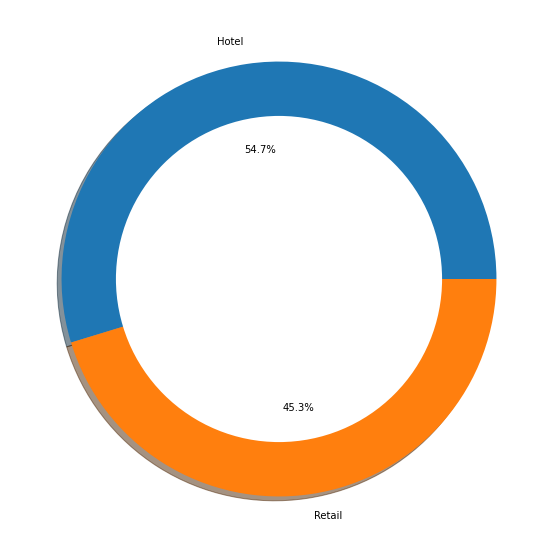

In [71]:
#1.1 Using donut plot, we can acertain the above inference that Hotel spends more
plot4=pd.DataFrame(data=df1.groupby("Channel")["Total"].sum().values,index=df1.groupby("Channel")["Total"].sum().index).rename_axis('Channel',axis=0)
plot4.reset_index(inplace=True)
plot4.columns=("Channel","Total")
plot4

plt.figure(figsize=(10,10))
plt.pie(plot4["Total"],labels=plot4["Channel"],autopct="%.1f%%",shadow=True)
circle = plt.Circle(xy=(0,0), radius= 0.75, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

In [72]:
#1.1 Check using groupby and sum, which Region spent more. Clearly Other region spends more and Oporto the least
print("The below table shows the total amount spent on all items per Region\n",df1.groupby("Region")["Total"].sum())

The below table shows the total amount spent on all items per Region
 Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total, dtype: int64


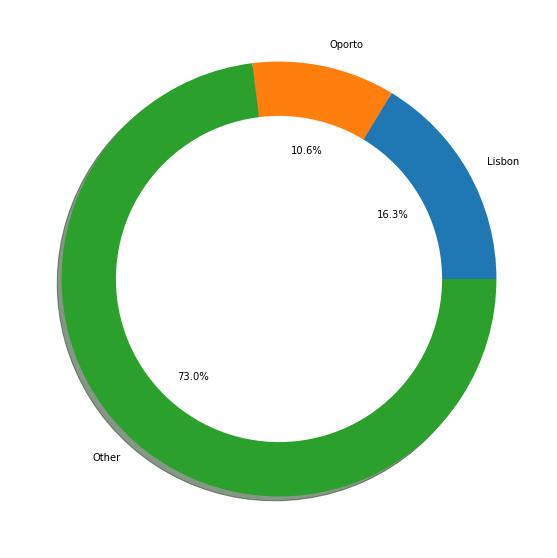

In [73]:
#1.1 Using donut plot, we can acertain the above inference that Other spends more and Oporto the least
plot4=pd.DataFrame(data=df1.groupby("Region")["Total"].sum().values,index=df1.groupby("Region")["Total"].sum().index).rename_axis('Channel',axis=0)
plot4.reset_index(inplace=True)
plot4.columns=("Region","Total")
plot4

plt.figure(figsize=(10,10))
plt.pie(plot4["Total"],labels=plot4["Region"],autopct="%.1f%%",shadow=True)
circle = plt.Circle(xy=(0,0), radius= 0.75, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

In [74]:
df1.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen', 'Total'],
      dtype='object')

In [75]:
# 1.2
df1_columns = ['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen']
df1_columns

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

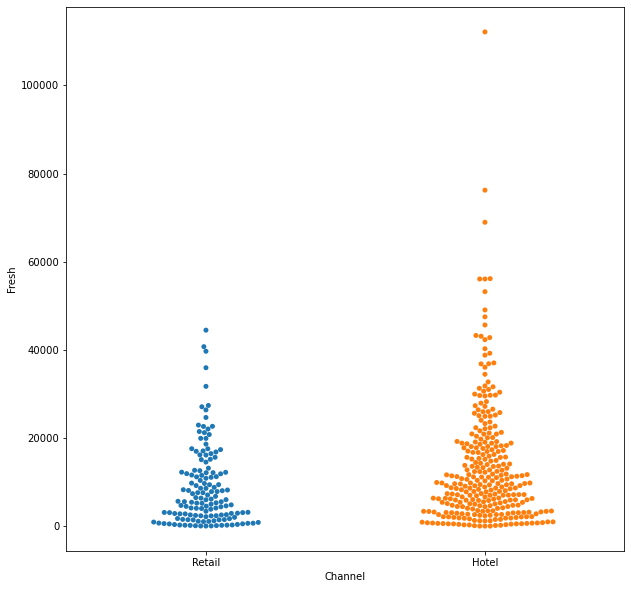

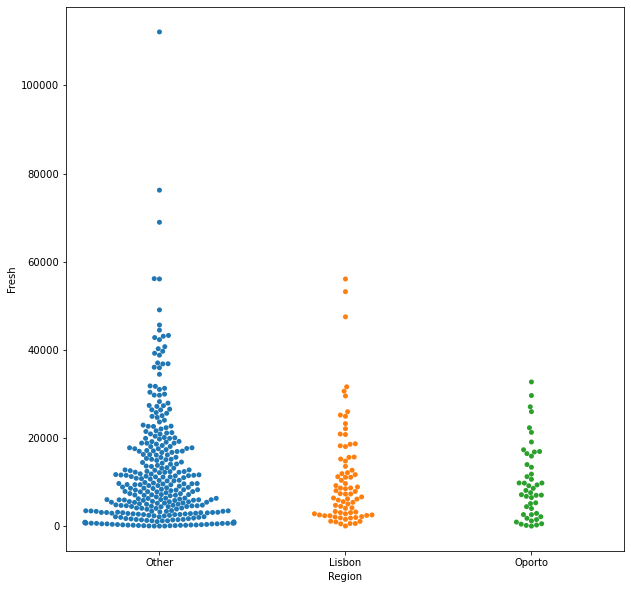

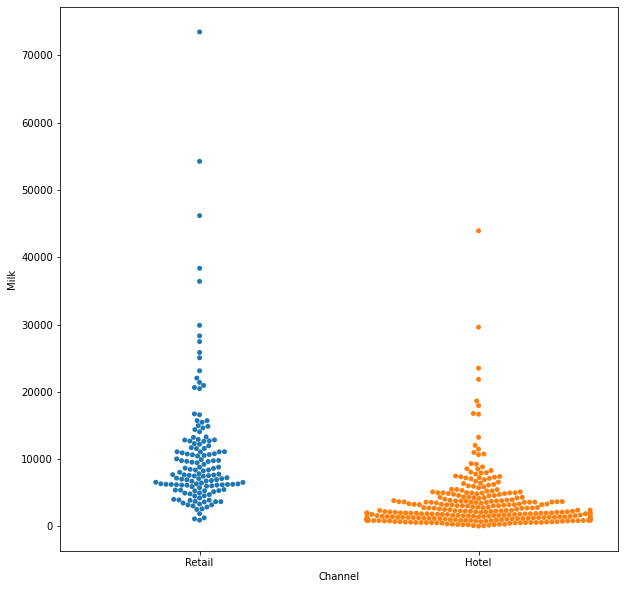

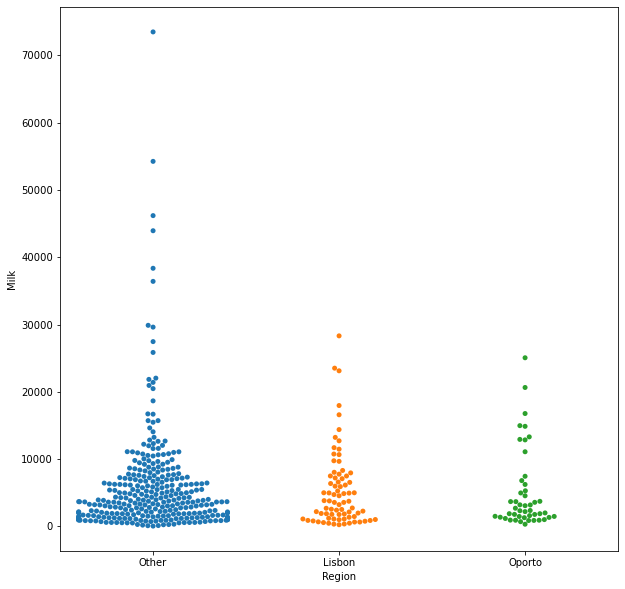

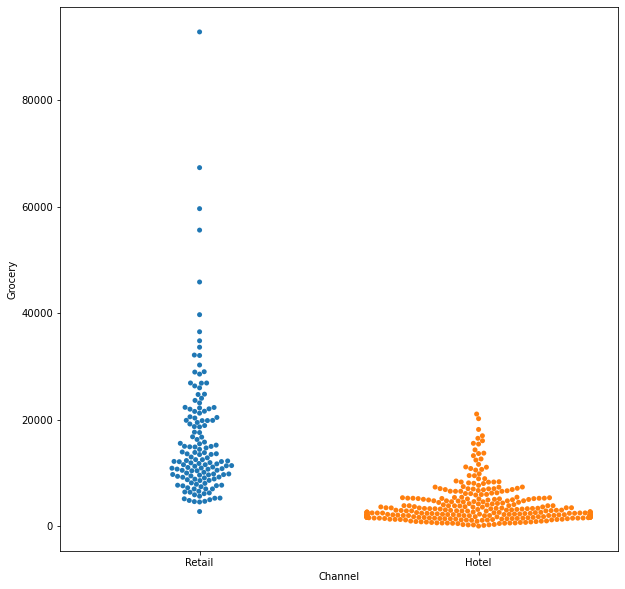

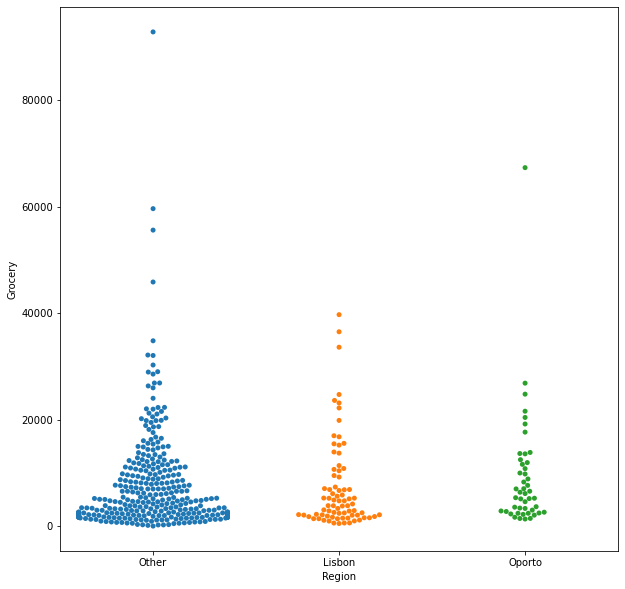

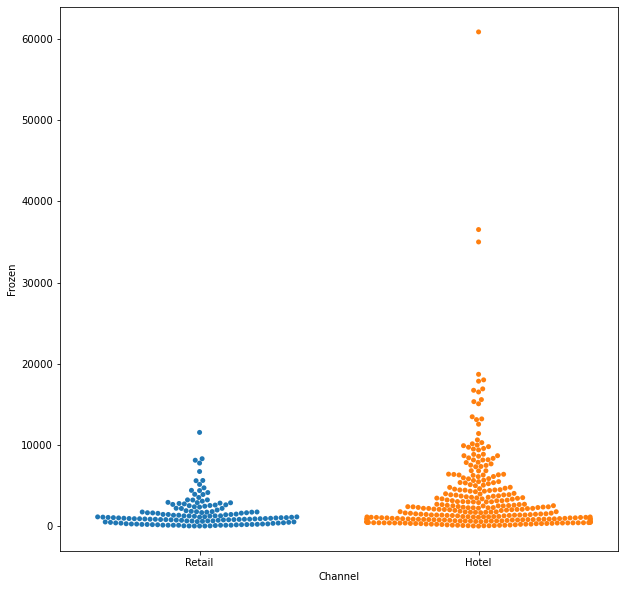

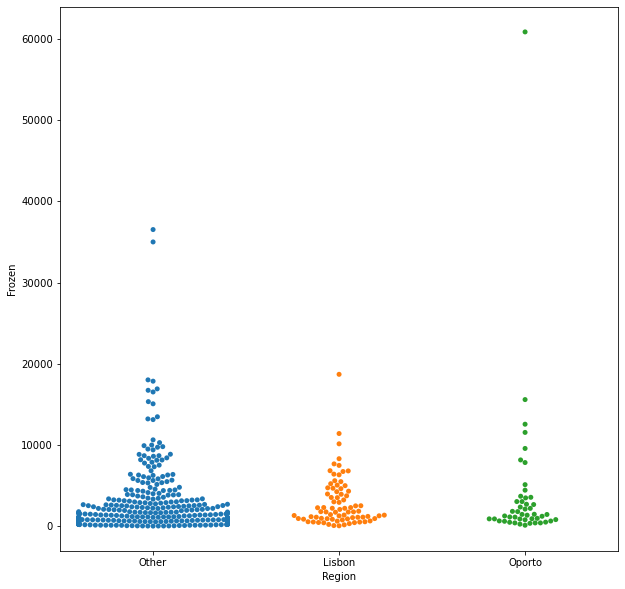

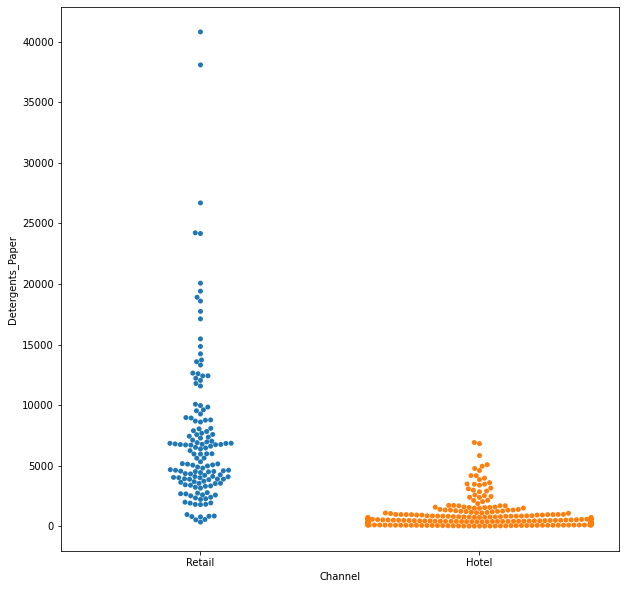

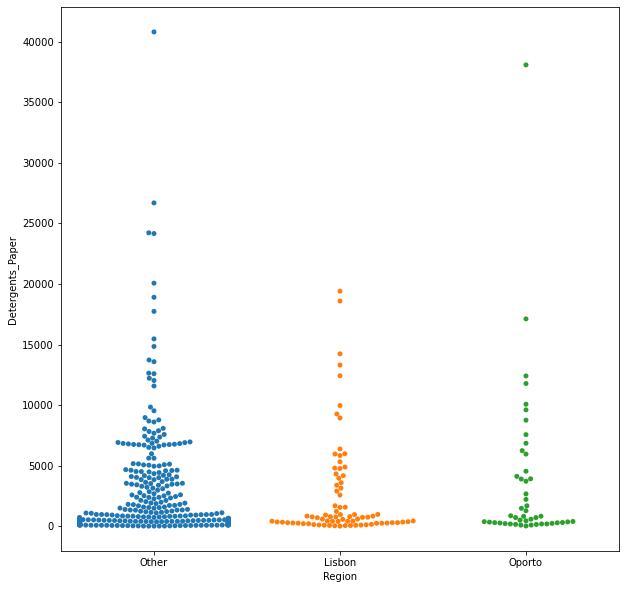

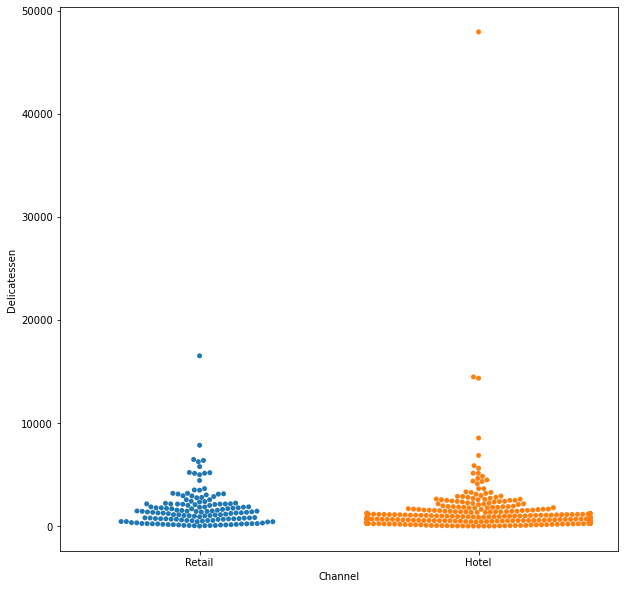

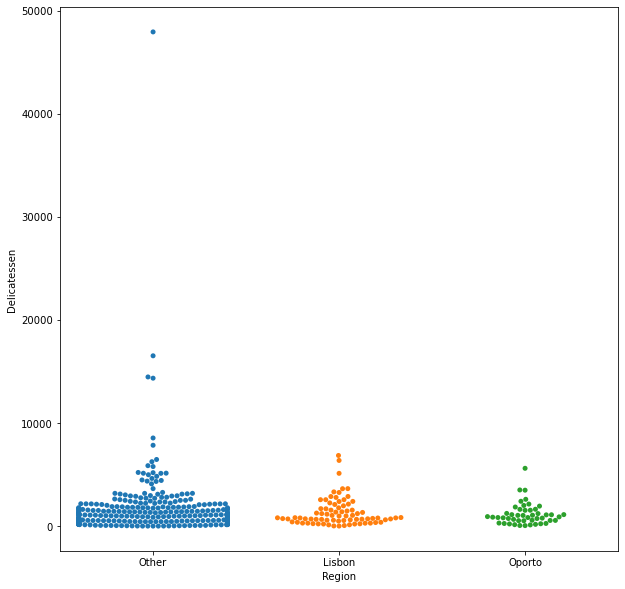

In [76]:
#1.2
for i in df1_columns:
    plt.figure(figsize=(10,10))
    sns.swarmplot(df1['Channel'],df1[i])
    plt.show()
    plt.figure(figsize=(10,10))
    sns.swarmplot(df1['Region'],df1[i])
    plt.show()

In [77]:
#1.3 Coefficient of Variance per item. Can clearly see Fresh item is most consistent in terms of amount spent and Delicatessen is the most inconsistent
print("The below table shows the coefficient of variance per item(level of consistency)\n")
for i in df1_columns:
    print(i,"----",df1[i].std()/df1[i].mean())

The below table shows the coefficient of variance per item(level of consistency)

Fresh ---- 1.0539179237473149
Milk ---- 1.2732985840065414
Grocery ---- 1.1951743730016824
Frozen ---- 1.5803323836352914
Detergents_Paper ---- 1.6546471385005155
Delicatessen ---- 1.8494068981158382


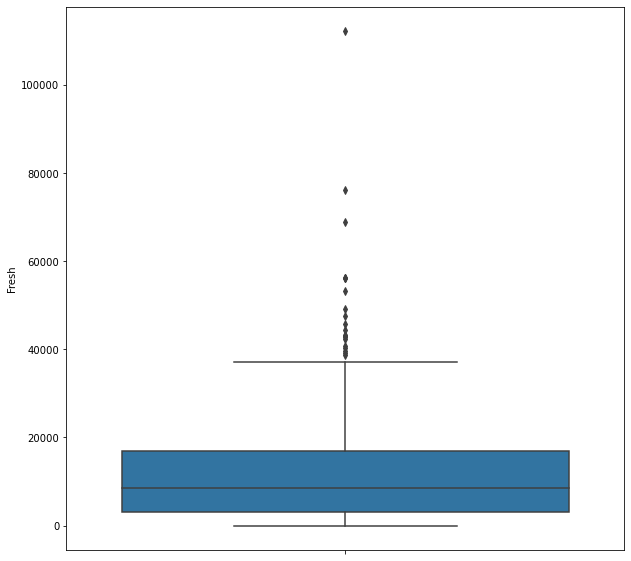

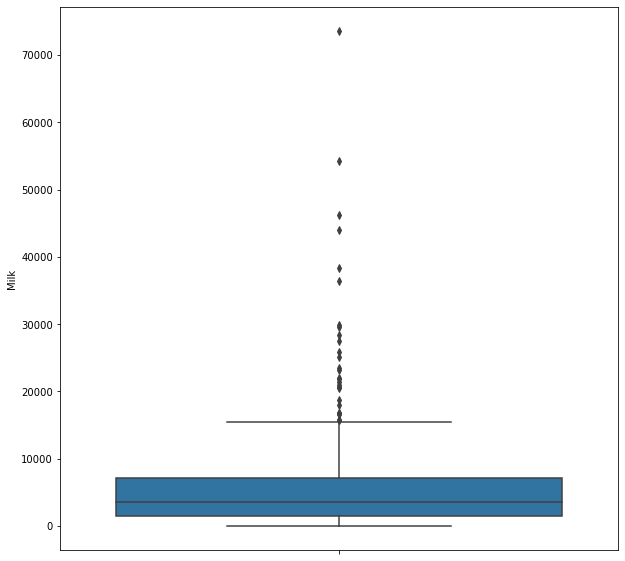

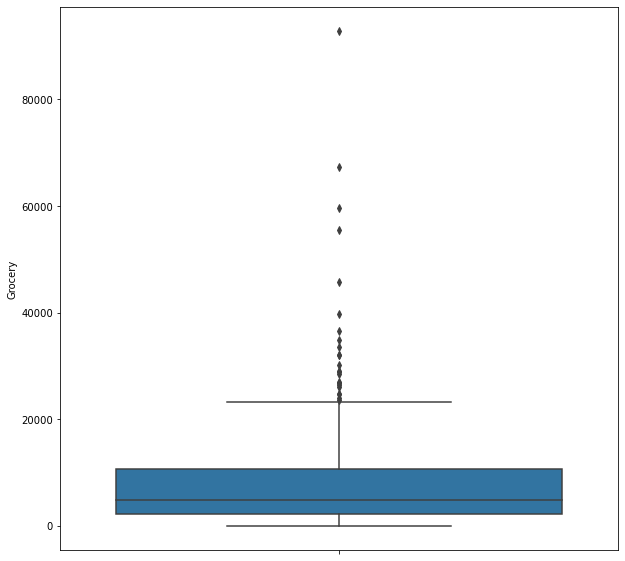

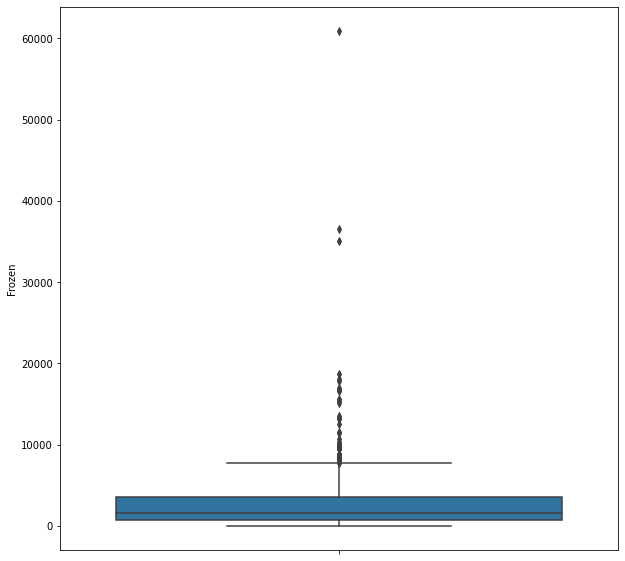

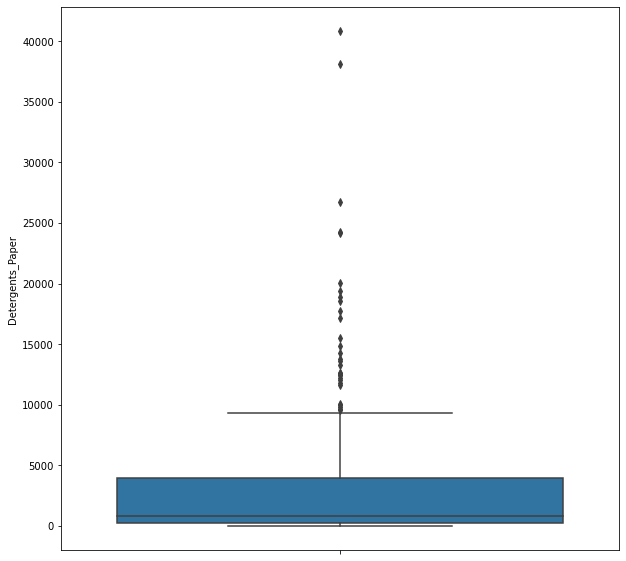

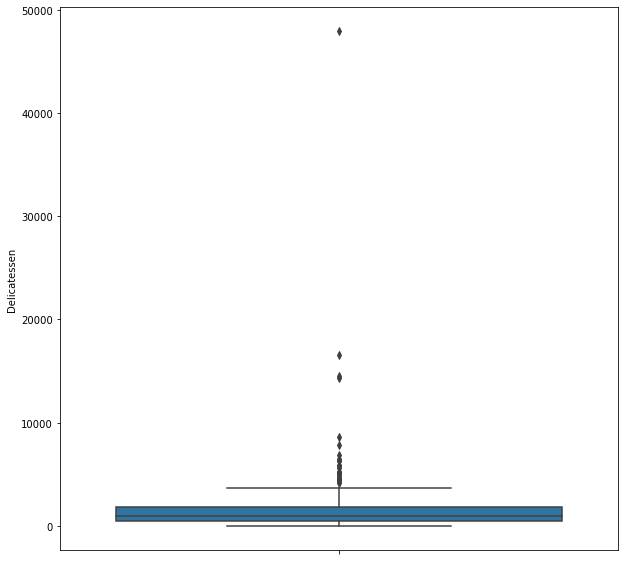

In [78]:
#1.4 Outliers in data
for i in df1_columns:
    plt.figure(figsize=(10,10))
    sns.boxplot(y=df1[i])
    plt.show()

In [ ]:
#Second Problem


In [79]:
#Read the dataset
df2 = pd.read_csv("Survey-1.csv")

In [80]:
df2.head()
df2

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.60,Part-Time,25.00,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.50,Part-Time,45.00,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.50,Full-Time,40.00,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.80,Unemployed,40.00,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.40,Part-Time,40.00,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.90,Part-Time,40.00,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.50,Part-Time,55.00,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.50,Part-Time,30.00,2,3,490,Laptop,50


In [81]:
#2.1.1
print("Below is the contingency table for Gender and Major\n")
pd.crosstab(df2.Gender,df2.Major, margins = False)

Below is the contingency table for Gender and Major



Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [82]:
#2.1.2
print("Below is the contingency table for Gender and Grad Intention\n")
pd.crosstab(df2.Gender,df2["Grad Intention"], margins = False)

Below is the contingency table for Gender and Grad Intention



Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [83]:
#2.1.3
print("Below is the contingency table for Gender and Employment\n")
pd.crosstab(df2.Gender,df2["Employment"], margins = False)

Below is the contingency table for Gender and Employment



Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [84]:
#2.1.4
print("Below is the contingency table for Gender and Computer\n")
pd.crosstab(df2.Gender,df2["Computer"], margins = False)

Below is the contingency table for Gender and Computer



Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [85]:
df2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.60,Part-Time,25.00,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.50,Part-Time,45.00,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.50,Full-Time,40.00,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.80,Unemployed,40.00,2,4,500,Laptop,100


In [86]:
print("The below table shows count of students, grouped by their gender\n",df2.value_counts("Gender"))

The below table shows count of students, grouped by their gender
 Gender
Female    33
Male      29
dtype: int64


In [87]:
#2.2.1 Probability of a randomly selected student to be male is 46.77%
print("Probability of a randomly selected student to be male is ",29/62*100,"%")

Probability of a randomly selected student to be male is  46.774193548387096 %


In [88]:
#2.2.2 Probability of a randomly selected student to be male is 53.22%
print("Probability of a randomly selected student to be male is ",(1-(29/62))*100,"%")

Probability of a randomly selected student to be male is  53.2258064516129 %


In [89]:
print("Below table shows number of students per Major, grouped by their gender\n",df2.groupby("Gender")["Major"].value_counts())

Below table shows number of students per Major, grouped by their gender
 Gender  Major                 
Female  Retailing/Marketing       9
        Economics/Finance         7
        International Business    4
        Management                4
        Accounting                3
        CIS                       3
        Other                     3
Male    Management                6
        Retailing/Marketing       5
        Accounting                4
        Economics/Finance         4
        Other                     4
        Undecided                 3
        International Business    2
        CIS                       1
Name: Major, dtype: int64


In [90]:
#2.3.1
#Conditional probability-- Management(male)
print("The Probability that a student is pursuing Management given that he is male is ",(6/62) * (62/29) * 100,"%")
#Conditional probability-- Retailing/Marketing(male)
print("The Probability that a student is pursuing Retailing/Marketing given that he is male is ",(5/62) * (62/29)* 100,"%")
#Conditional probability-- Accounting(male)
print("The Probability that a student is pursuing Accounting given that he is male is ",(4/62) * (62/29)* 100,"%")
#Conditional probability-- Accounting(male)
print("The Probability that a student is pursuing Economics/Finance given that he is male is ",(4/62) * (62/29)* 100,"%")
#Conditional probability-- Accounting(male)
print("The Probability that a student is pursuing Other courses given that he is male is ",(4/62) * (62/29)* 100,"%")
#Conditional probability-- Accounting(male)
print("The Probability that a student is still Undecided on the Maor given that he is male is ",(3/62) * (62/29)* 100,"%")
#Conditional probability-- Accounting(male)
print("The Probability that a student is pursuing International Business given that he is male is ",(2/62) * (62/29)* 100,"%")
#Conditional probability-- Accounting(male)
print("The Probability that a student is pursuing CIS given that he is male is ",(1/62) * (62/29)* 100,"%")

The Probability that a student is pursuing Management given that he is male is  20.68965517241379 %
The Probability that a student is pursuing Retailing/Marketing given that he is male is  17.241379310344826 %
The Probability that a student is pursuing Accounting given that he is male is  13.793103448275861 %
The Probability that a student is pursuing Economics/Finance given that he is male is  13.793103448275861 %
The Probability that a student is pursuing Other courses given that he is male is  13.793103448275861 %
The Probability that a student is still Undecided on the Maor given that he is male is  10.344827586206895 %
The Probability that a student is pursuing International Business given that he is male is  6.896551724137931 %
The Probability that a student is pursuing CIS given that he is male is  3.4482758620689653 %


In [91]:
#2.3.2
#Conditional probability-- Management(female)
print("The Probability that a student is pursuing Retailing/Marketing given that she is female is ",(9/62) * (62/33) * 100,"%")
#Conditional probability-- Retailing/Marketing(female)
print("The Probability that a student is pursuing Economics/Finance given that she is female is ",(7/62) * (62/33)* 100,"%")
#Conditional probability-- Accounting(female)
print("The Probability that a student is pursuing International Business given that she is female is ",(4/62) * (62/33)* 100,"%")
#Conditional probability-- Accounting(female)
print("The Probability that a student is pursuing Management given that she is female is ",(4/62) * (62/33)* 100,"%")
#Conditional probability-- Accounting(female)
print("The Probability that a student is pursuing Accounting given that she is female is ",(3/62) * (62/33)* 100,"%")
#Conditional probability-- Accounting(female)
print("The Probability that a student is pursuing CIS given that she is female is ",(3/62) * (62/33)* 100,"%")
#Conditional probability-- Accounting(female)
print("The Probability that a student is pursuing Other courses given that she is female is ",(3/62) * (62/33)* 100,"%")

The Probability that a student is pursuing Retailing/Marketing given that she is female is  27.272727272727277 %
The Probability that a student is pursuing Economics/Finance given that she is female is  21.21212121212121 %
The Probability that a student is pursuing International Business given that she is female is  12.121212121212121 %
The Probability that a student is pursuing Management given that she is female is  12.121212121212121 %
The Probability that a student is pursuing Accounting given that she is female is  9.090909090909092 %
The Probability that a student is pursuing CIS given that she is female is  9.090909090909092 %
The Probability that a student is pursuing Other courses given that she is female is  9.090909090909092 %


In [92]:
#2.4.1
print("The probability That a randomly chosen student is a male and intends to graduate is ",17/29*100)

The probability That a randomly chosen student is a male and intends to graduate is  58.620689655172406


In [93]:
#2.4.2
print("The probability that a randomly selected student is a female and does NOT have a laptop is ",2/33*100)

The probability that a randomly selected student is a female and does NOT have a laptop is  6.0606060606060606


In [94]:
#2.5.1
print("The probability that a randomly chosen student is a male or has full-time employment is ",((29/62)+(10/62)-(7/62))*100)

The probability that a randomly chosen student is a male or has full-time employment is  51.61290322580645


In [95]:
#2.5.2
print("The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is ",(2*(4/33))*100)

The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is  24.242424242424242


In [96]:
df2_decided=df2[df2["Grad Intention"]!="Undecided"]
df2_female_decided=pd.crosstab(df2_decided.Gender,df2_decided["Grad Intention"], margins = False)

In [97]:
#2.6 df2_female_decided.corr()
df2_female_decided

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [99]:
#2.6
print("The probability that the graduate intention is yes given it is a female student is ",11/62*100)
print("Which is not equal to p(female)*p(graduate intention yes), i.e. ",(33/62)*(28/62)*100)
print("But it is equal to p(graduate intention yes)*p(Female/graduate intention yes) i.e. ",(28/62)*(11/28)*100)
print("Hence the graduate intention and being female are not independent events")

The probability that the graduate intention is yes given it is a female student is  17.741935483870968
Which is not equal to p(female)*p(graduate intention yes), i.e.  24.037460978147763
But it is equal to p(graduate intention yes)*p(Female/graduate intention yes) i.e.  17.741935483870964
Hence the graduate intention and being female are not independent events


In [100]:
#2.7.1
print("If a student is chosen randomly,the probability that his/her GPA is less than 3 is ",(df2[df2["GPA"]<3]["GPA"].value_counts().sum()/62)*100)

If a student is chosen randomly,the probability that his/her GPA is less than 3 is  27.419354838709676


In [101]:
df2[df2["Salary"]>=50]["Gender"].value_counts()

Female    18
Male      14
Name: Gender, dtype: int64

In [102]:
#2.7.2
print("The conditional probability that a randomly selected male earns 50 or more is ",(14/29)*100)
print("The conditional probability that a randomly selected female earns 50 or more is ",(18/33)*100)

The conditional probability that a randomly selected male earns 50 or more is  48.275862068965516
The conditional probability that a randomly selected female earns 50 or more is  54.54545454545454


<AxesSubplot:xlabel='GPA', ylabel='Density'>

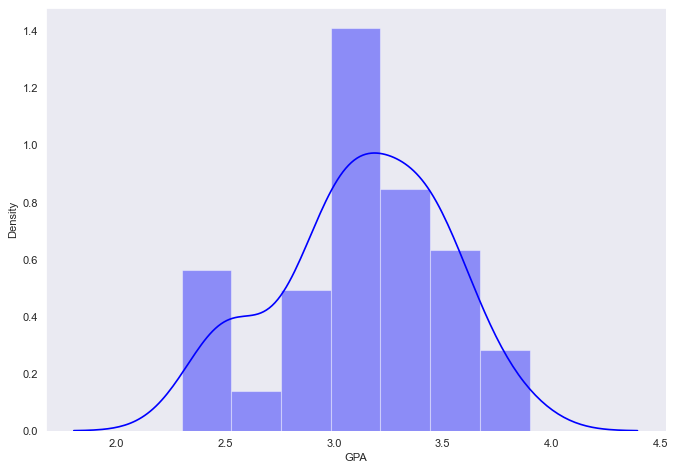

In [103]:
#2.8
sns.set_style("dark")
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df2["GPA"], color="blue", label="Compact")

<AxesSubplot:xlabel='Salary', ylabel='Density'>

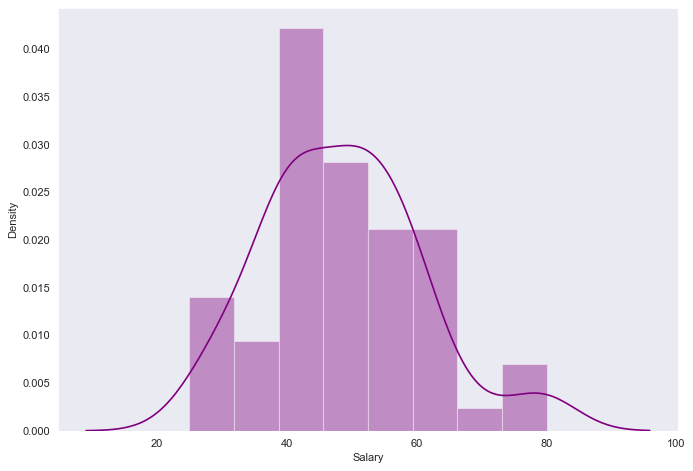

In [104]:
#2.8
sns.set_style("dark")
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df2["Salary"], color="purple", label="Compact")

<AxesSubplot:xlabel='Spending', ylabel='Density'>

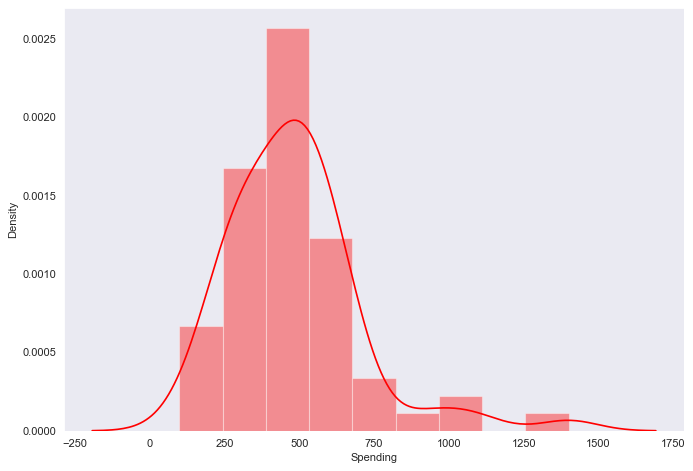

In [105]:
#2.8
sns.set_style("dark")
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df2["Spending"], color="red", label="Compact")

<AxesSubplot:xlabel='Text Messages', ylabel='Density'>

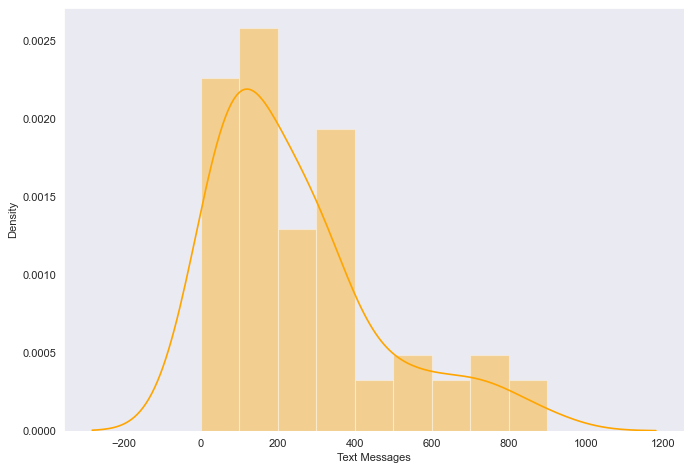

In [106]:
#2.8
sns.set_style("dark")
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df2["Text Messages"], color="orange", label="Compact")

In [120]:
#Third Problem

In [107]:
#Read the dataset
df3 = pd.read_csv("A+&+B+shingles.csv")

In [108]:
df3

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [109]:
#3.1 We reject H0 as pvalue/2 < 0.05. i.e there is no evidence that means moisture contents in B type shingles are within the permissible limits
stats.ttest_1samp(df3["B"],0.35,nan_policy='omit')

Ttest_1sampResult(statistic=-3.1003313069986995, pvalue=0.004180954800638365)

In [110]:
#3.1 We accept H0 as pvalue/2 > 0.05. i.e there is evidence that means moisture contents in A type shingles are within the permissible limits
stats.ttest_1samp(df3["A"],0.35,nan_policy='omit')

Ttest_1sampResult(statistic=-1.4735046253382782, pvalue=0.14955266289815025)

In [111]:
#3.2 Since pvalue/2 > 0.05 we accept H0 i.e. population mean of both A and B Shingles are same
stats.ttest_ind(df3["A"],df3["B"],nan_policy='omit')

Ttest_indResult(statistic=1.2896282719661123, pvalue=0.2017496571835306)

In [112]:
# 3.2 Assumptions
#Samples drawn from a normal distribution
#The samples have same variance